In [76]:
# !pipenv install pandas
# !pipenv install matplotlib
# !pipenv install numpy
# !pipenv install sklearn
# !pipenv install category_encoders
# !pipenv install ipykernel

In [77]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 999)

#loading training data
train_data = pd.read_csv("D:/Codes/MLOps/big_mart_sales/big_mart_sales/data/raw/train.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [78]:
train_data.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [79]:
# Checking presence of skewness in item weight and category distribution in Outlet size
# train_data['Outlet_Size'].value_counts()
# train_data['Item_Weight'].skew()


In [80]:
#Imputing mean values for item_weight and mode for outlet_size
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [81]:
train_data['Outlet_Size'].value_counts()


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [82]:
#Handling Categorical Variables
categorical_data = train_data.select_dtypes(exclude=[np.number])
categorical_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [83]:
# Nominal - Item_Type, Item_Fat_Content
# Ordinal - Outlet_Size, Outlet_Location_Type,Outlet_Type

In [84]:
categorical_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [85]:
train_data['Item_Fat_Content'] = np.where((train_data['Item_Fat_Content'] == 'Regular') | (train_data['Item_Fat_Content'] == 'reg'),1,0)

In [86]:
train_data['Item_Type'].value_counts() #One Hot

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [87]:
train_data['Outlet_Size'].value_counts() #Label Encoding

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [88]:
train_data['Outlet_Location_Type'].value_counts()# Label encoding

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [89]:

train_data['Outlet_Type'].value_counts() # One hot

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [90]:
train_data['Outlet_Identifier'].value_counts() #one hot

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [91]:
# One Hot Encoding Outlet_Type and Item_Type
import category_encoders as ce
ohe = ce.OneHotEncoder(cols = ['Outlet_Type','Item_Type','Outlet_Identifier'],use_cat_names=True)
#Encoding
train_data = ohe.fit_transform(train_data)

In [92]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
  
# label encoder object initialization
le = LabelEncoder()
  
categ = ['Outlet_Size','Outlet_Location_Type']

# Encode Categorical Columns

train_data[categ] = train_data[categ].apply(le.fit_transform)


In [93]:
train_data['Outlet_Size'].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [94]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler
#Initializing object
scaler = StandardScaler()
 
train_data['Item_MRP']= scaler.fit_transform(np.array(train_data['Item_MRP']).reshape(-1,1))




Model Building

In [95]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# separate the independent and target variable 
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.30,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((5966, 37), (2557, 37), (5966,), (2557,))

In [53]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  1.5900890440410826e-12
RMSE on test data:  1.6410319711819787e-12


In [96]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  887.8480703801139
RMSE on test data:  1120.9352625971799


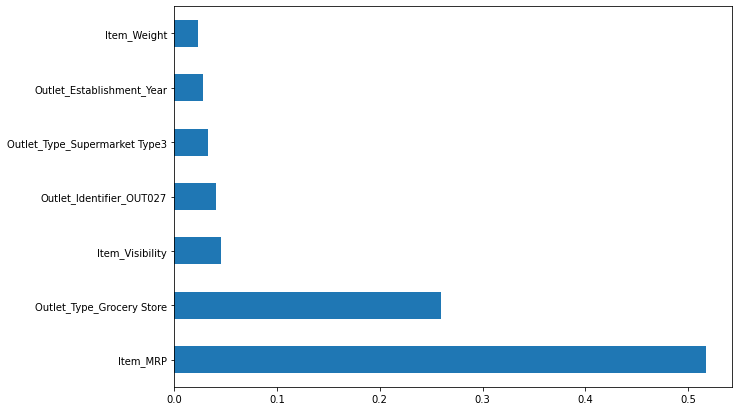

In [97]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [98]:
# training data with 7 most important features
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]
# test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  890.5829941461282
RMSE on test data:  1118.8081343343517
